In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

(35.0, 50.0)

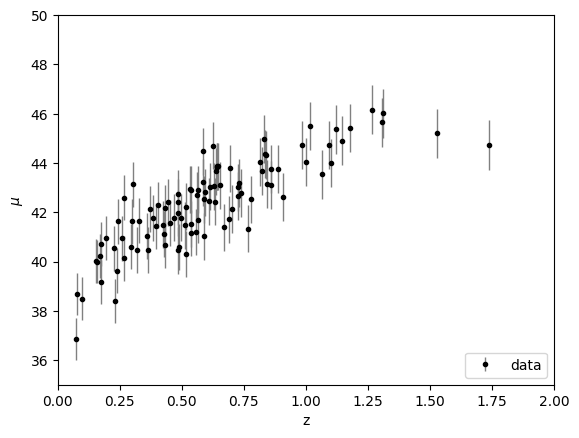

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

In [3]:
x = z_sample[:,np.newaxis]
y = mu_sample[:,np.newaxis]

## GPR

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla

In [5]:
kernel = kernels.ConstantKernel(1.0, (1e-3, 1e3)) * kernels.RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,
                               alpha=dmu ** 2, 
                               random_state=0)
gp.fit(x, mu_sample)

x_grid = np.linspace(0, 2, 200)
f, f_err = gp.predict(x_grid[:,np.newaxis], return_std=True)

# we have fit for the `h` parameter: print the result here:
print("best-fit theta =", gp.kernel_.theta[0])

best-fit theta = 6.847322808902002


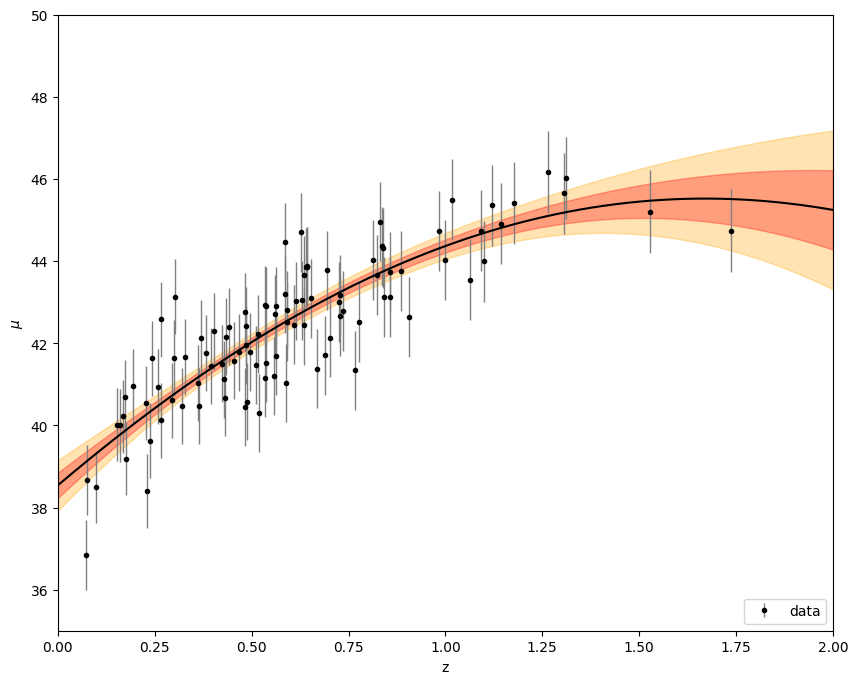

In [6]:
plt.figure(figsize=(10,8))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid,f, color='k')
plt.fill_between(x_grid, f - 2 * f_err, f + 2 * f_err, color='orange', alpha=0.3)
plt.fill_between(x_grid, f - 1 * f_err, f + 1 * f_err, color='red', alpha=0.3)

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

Note: In reality I'll want to find the parameters with cross validation like we did last time.

# <span style="color:red"> !!! Finire esercizio (fit MCMC and cloning) !!! </span> 